In [1]:
import pandas as pd
import sys
import os
import numpy as np
sys.path.insert(0, '..')
import seaborn as sns
import matplotlib.pyplot as plt
import spectral_denoising as sd
from spectral_denoising.search_utils import *
from spectral_denoising.file_io import read_df, save_df
from spectral_denoising.spectral_operations import *
from spectral_denoising.spectral_denoising import *
from spectral_denoising.spectra_plotter import *
from spectral_denoising.seven_golden_rules import *
%load_ext autoreload
%autoreload 2
fig_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/dilution_series_data/new_fig_arial/extended_figures/nist'
if os.path.exists(fig_dir) == False:
    os.mkdir(fig_dir)
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'

In [2]:
def calculate_overall_count(arrays):
    """
    Function to calculate the overall count of frequency counts across multiple arrays.
    
    Parameters:
    - arrays: A list of lists, where each inner list is an array of numbers.
    
    Returns:
    - A DataFrame with the overall frequency count information across all arrays.
    """

    overall_frequency_counts = {}

    # Iterate through each array
    for arr in tqdm(arrays):
        # Calculate frequency of each number in the current array
        frequency = {}
        for num in arr:
            frequency[num] = frequency.get(num, 0) + 1

        # Calculate how many times each frequency occurs in the current array
        frequency_counts = {}
        for freq in frequency.values():
            frequency_counts[freq] = frequency_counts.get(freq, 0) + 1

        # Update overall frequency counts
        for freq, count in frequency_counts.items():
            overall_frequency_counts[freq] = overall_frequency_counts.get(freq, 0) + count

    # Create DataFrame from the overall frequency counts
    df_overall = pd.DataFrame(list(overall_frequency_counts.items()), columns=['Frequency', 'Count'])

    return df_overall

In [3]:
library_dir = '/Users/fanzhoukong/Documents/GitHub/Libgen_data/curated_library/csv'
nist_pos = read_df(os.path.join(library_dir, 'pos_orbi_nist_sorted.csv'))
# nist_pos_sampled = read_df(os.path.join(library_dir, 'pos_orbi_nist_sampled.csv'))

done read in df...


In [5]:
nist_pos.dropna(subset='smiles',inplace=True)

In [6]:
nist_pos_sampled = nist_pos.sample(10000, random_state=42)

In [8]:
msms_d = sd.spectral_denoising_batch(nist_pos_sampled['peaks'], nist_pos_sampled['smiles'], nist_pos_sampled['adduct'])
simi = []
for i in range(len(msms_d)):
    simi.append(entropy_similairty(msms_d[i], nist_pos_sampled.iloc[i]['peaks'], pmz=nist_pos_sampled.iloc[i]['precursor_mz']))

100%|██████████| 9749/9749 [01:00<00:00, 161.57it/s]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


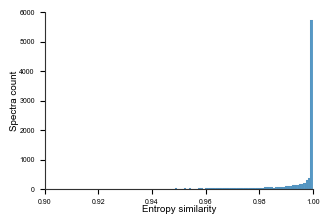

In [ ]:
fig = plt.figure(figsize =(3.46, 3.46/3*2))#43
ax = fig.add_subplot()
#

ax= sns.histplot(simi, bins=1000)
# plt.xticks(df_statistc['Frequency'])
# ax.get_lines()[0].remove()
# plt.xlim(0, 100)
ax.set_xlabel('Entropy similarity',size = 7, labelpad=0.2)
ax.set_ylabel('Spectra count', size = 7, labelpad=0.2)
ax.set_xlim(0.9,1)
plt.tick_params(labelsize=5)
# plt.setp(ax.patches, linewidth=1)
# ax.set_frame_on(True)
# ax.set_ylim(0,1)
# plt.axvline(4, color = 'orange', linestyle = '--')
# sns.lineplot(x = range(1,14), y = ns_means)
# sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
ax.grid(False)
ax.set_facecolor("white")
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
# sns.spines(top = False, right=False)
plt.savefig(os.path.join(library_dir, 'spectral_denoising_validation_latest.eps'), format='eps', dpi=300)

# calculating identical ion intensity counts

In [ ]:
nist_pos = read_df(os.path.join(library_dir, 'pos_orbi_nist_sorted.csv'))
nested_array = []
for index, row in tqdm(nist_pos.iterrows(), total = len(nist_pos)):
    mass, intensity = so.break_spectrum(so.truncate_spectrum(row['peaks'], row['precursor_mz']-1.6))
    if isinstance(intensity, float) is False:
        nested_array.append(intensity)

done read in df...


100%|██████████| 1283801/1283801 [00:27<00:00, 46745.72it/s]


In [ ]:
df_statistc = calculate_overall_count(nested_array)

100%|██████████| 1283801/1283801 [00:08<00:00, 147063.56it/s]


In [ ]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_ylabel():
        text = label
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

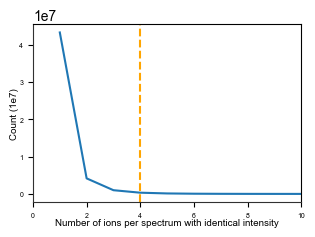

In [ ]:
fig = plt.figure(figsize = (3.46, 3.46/3*2))#43
# ax = fig.add_subplot()
#

ax= sns.lineplot(data=df_statistc, x="Frequency", y = 'Count')
# plt.xticks(df_statistc['Frequency'])
# ax.get_lines()[0].remove()
# plt.xlim(0, 100)
ax.set_ylabel('Count (1e7)',size = 7, labelpad=0.2)
ax.set_xlabel('Number of ions per spectrum with identical intensity', size = 7, labelpad=0.2)
ax.set_xlim(0, 10)
plt.axvline(4, color = 'orange', linestyle = '--')
# # sns.lineplot(x = range(1,14), y = ns_means)
# # sns.histplot(library_bad_quality['normalized_entropy'], label = 'low_quality')
# # plt.vlines(x = 0.8, ymin=0, ymax=250, color = 'red')
# plt.grid(False)
ax.set_facecolor("white")
plt.tick_params(labelsize=5)
ax.spines['left'].set_color('#313131')
ax.spines['bottom'].set_color('#313131')
plt.savefig(os.path.join(fig_dir, 'frequency_counts.eps'), dpi = 300)
# plt.legend(facecolor='white', loc = 'upper left')
# ax.legend(facecolor='white', )